<a href="https://colab.research.google.com/github/CARLVINMUTAHI/Data_Science/blob/main/CrimeAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import the dataset**

In [4]:
from google.colab import files
uploads=files.upload()

Saving US_Crime_Rates_1960_2014.csv to US_Crime_Rates_1960_2014.csv


**Assign to variable crime**

In [86]:
crime=pd.read_csv('US_Crime_Rates_1960_2014.csv')

**Data Type of the columns**

In [87]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

**Convert column Year into datetime data type**

In [88]:
crime['dt_Year']= pd.to_datetime(crime.Year,format='%Y')

**Confirm the datatype is set to datetime**

In [89]:
crime.dtypes

Year                           int64
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dt_Year               datetime64[ns]
dtype: object

**Set year as index**

In [90]:
crime.set_index('dt_Year',inplace=True)

**Drop the Total Column**

In [91]:
del crime['Total']

**Confirm the column was dropped**

In [92]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1960-01-01 to 2014-01-01
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


**Group year by decade and sum the values**

In [95]:
crime['Decade'] = crime.Year // 10

In [96]:
cs = crime.loc[:,'Population':'Vehicle_Theft'].columns

In [97]:
agg = {c:'sum' for c in cs}
agg['Population'] ='last'

In [98]:
crime.groupby('Decade').agg(agg)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Decade,,,,,,,,,,
196,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
197,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
198,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
199,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
200,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
201,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [93]:
x = pd.to_datetime(crime.Year, format="%Y")

In [94]:
x.dt.year//10

dt_Year
1960-01-01    196
1961-01-01    196
1962-01-01    196
1963-01-01    196
1964-01-01    196
1965-01-01    196
1966-01-01    196
1967-01-01    196
1968-01-01    196
1969-01-01    196
1970-01-01    197
1971-01-01    197
1972-01-01    197
1973-01-01    197
1974-01-01    197
1975-01-01    197
1976-01-01    197
1977-01-01    197
1978-01-01    197
1979-01-01    197
1980-01-01    198
1981-01-01    198
1982-01-01    198
1983-01-01    198
1984-01-01    198
1985-01-01    198
1986-01-01    198
1987-01-01    198
1988-01-01    198
1989-01-01    198
1990-01-01    199
1991-01-01    199
1992-01-01    199
1993-01-01    199
1994-01-01    199
1995-01-01    199
1996-01-01    199
1997-01-01    199
1998-01-01    199
1999-01-01    199
2000-01-01    200
2001-01-01    200
2002-01-01    200
2003-01-01    200
2004-01-01    200
2005-01-01    200
2006-01-01    200
2007-01-01    200
2008-01-01    200
2009-01-01    200
2010-01-01    201
2011-01-01    201
2012-01-01    201
2013-01-01    201
2014-01-01    201
Na

**The most dangerous decade to live**

In [99]:
gb = crime.groupby("Decade").agg(agg)

In [100]:
gb= gb.astype(float)

In [102]:
trends= gb.loc[:,'Violent':"Vehicle_Theft"].div(gb.Population,'rows')

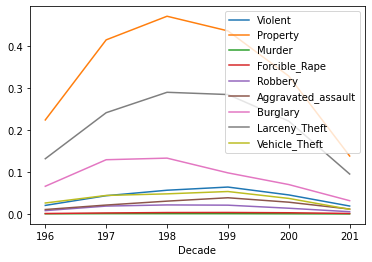

In [103]:
trends.plot()